# Работа с дисбалансом классов

**В данном ноутбуке рассматриваются техники борьбы с дисбалансом классов и исследуется эффективность их применения**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/data_random.csv')
df.sample(10)

,Country,Date,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Crisis
1809,FI,1999.25,0.334411,0.317551,0.031073,0.046135,0.163407,0.342305,0.036144,0.192376,0.674969,0.134789,0
949,DE,1972.25,0.268924,0.337463,0.355834,0.895732,0.912373,0.958020,0.828454,0.765951,0.328502,0.424269,0
1197,DK,1987.25,0.450276,0.695259,0.651937,0.225656,0.327024,0.312012,0.677015,0.829336,0.442189,0.249050,1
1915,FR,1978.75,0.336997,0.115759,0.872586,0.753986,0.450771,0.563347,0.421306,0.434097,0.434692,0.417188,0
3272,JP,1989.00,0.320076,0.552047,0.213330,0.646081,0.588334,0.245913,0.591349,0.131573,0.497721,0.308088,0
2938,IE,1999.50,0.351295,0.136831,0.206760,0.770522,0.496189,0.311521,0.241020,0.777556,0.178230,0.297374,0
383,BG,1971.75,0.657779,0.767313,0.340976,0.849200,0.113521,0.923164,0.601017,0.204335,0.743313,0.736098,0
1636,ES,2003.00,0.431263,0.139997,0.527533,0.572374,0.466879,0.263184,0.884145,0.992254,0.680426,0.538612,0
77,AT,1989.25,0.586335,0.340834,0.915603,0.812702,0.770584,0.370282,0.646195,0.558800,0.375213,0.517752,0
5317,SI,1983.25,0.740445,0.349211,0.910884,0.459068,0.619536,0.073805,0.583626,0.945761,0.444225,0.293177,0


## Кросс-валидация

In [ ]:
columns_target=['Crisis']
columns_train=['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10']
X=df[columns_train]
Y=df[columns_target]

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

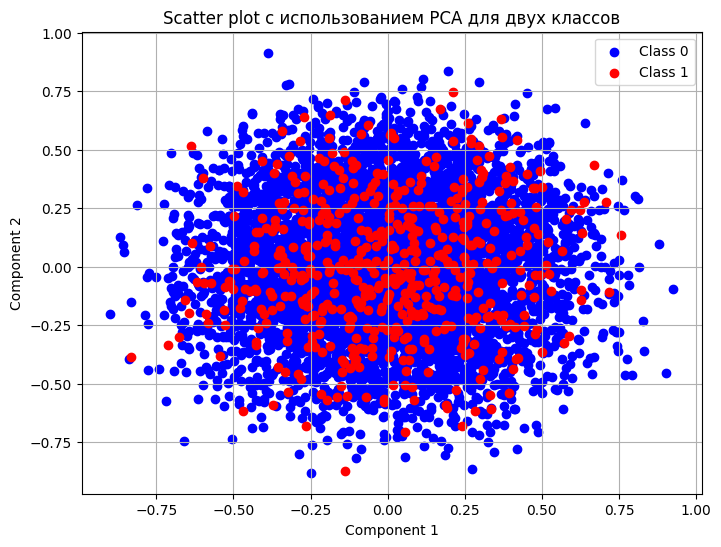

In [ ]:
# Применяем PCA для сокращения размерности до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = Y

# Создаем scatter plot для двух компонент
plt.figure(figsize=(8, 6))

plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')

plt.title('Scatter plot с использованием PCA для двух классов')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()


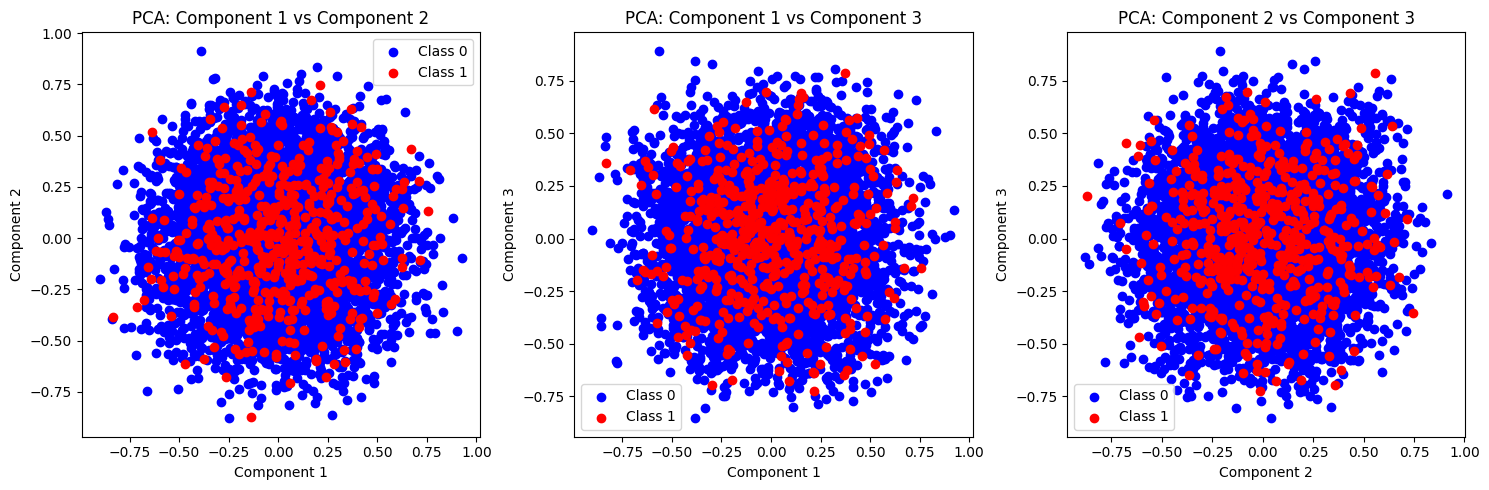

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для сокращения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = Y

# Создаем scatter plot для каждой пары компонентов
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Component 1 vs Component 2')

plt.subplot(132)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 1 vs Component 3')

plt.subplot(133)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 2 vs Component 3')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size = 0.3, random_state = 42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time.
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=13)

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
y_train_1d = np.ravel(y_train)

In [ ]:
score = cross_val_score(rf, X_train, y_train_1d, cv=kf, scoring='f1')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0. 0. 0. 0. 0.]
Average Cross Validation Recall score: 0.0


In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf,
                          scoring='f1').fit(X_train, y_train_1d)

In [ ]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 50, 'random_state': 13}
Best score: 0.005063291139240506


In [ ]:
y_pred = grid_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[1581    1]
 [ 167    0]]


In [ ]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.0,0.0,0.0,0.903945


Таким образом, дисбаланс классов снова отрицательно сказывается на качестве метрик; требуется исследование других подходов

## Рандомная передискретизация

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [ ]:
y_train=y_train_1d

In [ ]:
X_over, y_over = ros.fit_resample(X_train, y_train)

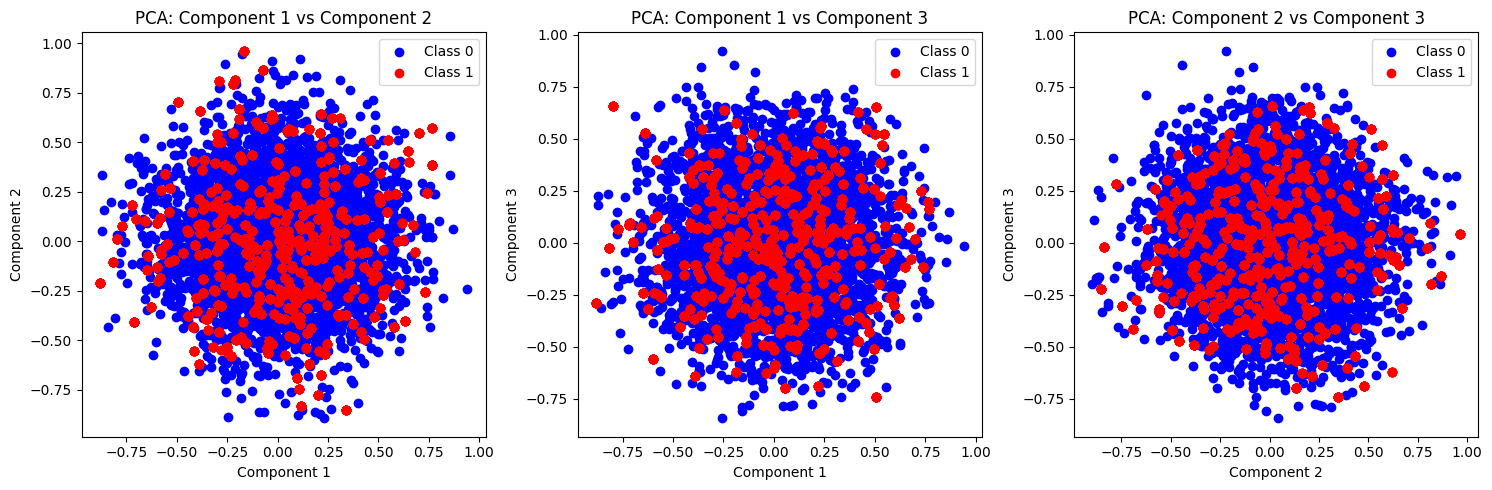

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для сокращения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_over)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = y_over

# Создаем scatter plot для каждой пары компонентов
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Component 1 vs Component 2')

plt.subplot(132)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 1 vs Component 3')

plt.subplot(133)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 2 vs Component 3')

plt.tight_layout()
plt.show()

In [ ]:
# Подсчет уникальных значений в массиве NumPy
unique_values, counts = np.unique(y_over, return_counts=True)

# Вывод количества уникальных значений и их процентного соотношения
for value, count in zip(unique_values, counts):
    percentage = count / len(y_over) * 100
    print(f'{value}: {count} / {percentage:.2f}% of the dataset')

0: 3689 / 50.00% of the dataset
1: 3689 / 50.00% of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=kf)

In [ ]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train_1d, scoring='f1', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0. 0. 0. 0. 0.]
Average Cross Validation Recall score: 0.0


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_over_rf = GridSearchCV(random_overs_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
grid_over_rf.fit(X_train, y_train_1d)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomoversampler',
                                        RandomOverSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='f1')

In [ ]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__random_state': 13}
Best score: 0.14478752073932796


In [ ]:
y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

over_rf_Recall = recall_score(y_test, y_pred)
over_rf_Precision = precision_score(y_test, y_pred)
over_rf_f1 = f1_score(y_test, y_pred)
over_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[897 685]
 [100  67]]


In [ ]:
ndf = [(over_rf_Recall, over_rf_Precision, over_rf_f1, over_rf_accuracy)]

over_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
over_rf_score.insert(0, 'Random Forest with', 'Random Oversampling')
over_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Random Oversampling,0.401198,0.089096,0.145811,0.551172


Несмотря на то, что данный подход положительно повлиял на ранее нулевые метрики, модель переобучилась, что явно видно по метрике точности

## Рандомная подвыборка

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

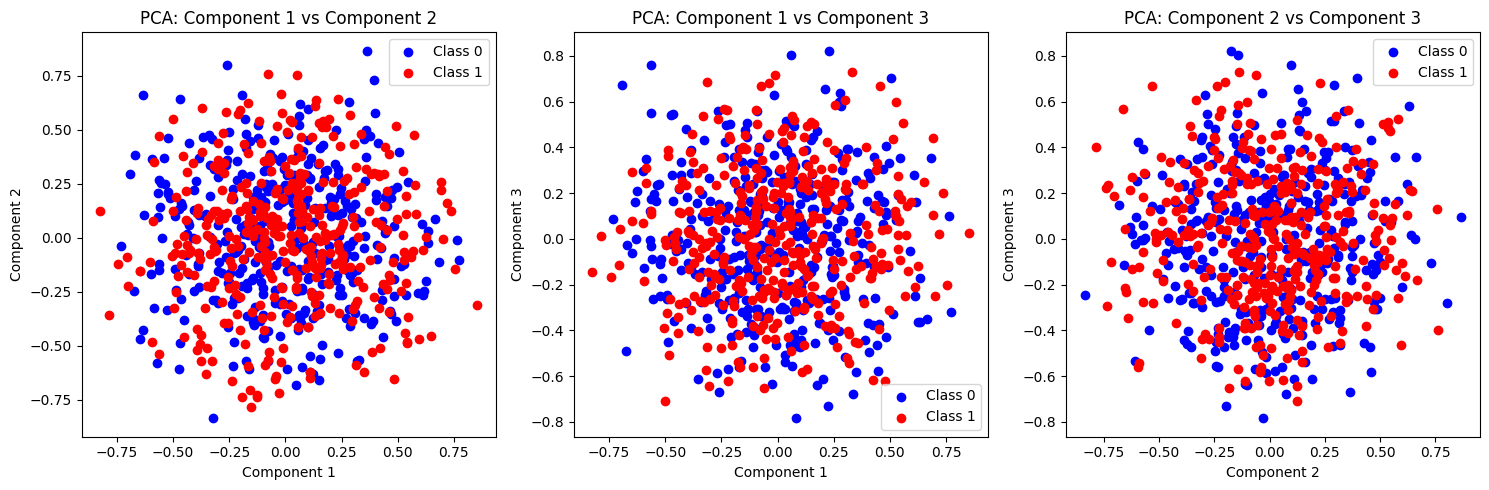

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для сокращения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_under)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = y_under

# Создаем scatter plot для каждой пары компонентов
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Component 1 vs Component 2')

plt.subplot(132)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 1 vs Component 3')

plt.subplot(133)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 2 vs Component 3')

plt.tight_layout()
plt.show()

In [ ]:
# Подсчет уникальных значений в массиве NumPy
unique_values, counts = np.unique(y_under, return_counts=True)

# Вывод количества уникальных значений и их процентного соотношения
for value, count in zip(unique_values, counts):
    percentage = count / len(y_under) * 100
    print(f'{value}: {count} / {percentage:.2f}% of the dataset')

0: 390 / 50.00% of the dataset
1: 390 / 50.00% of the dataset


Данный метод преобразовал датасет в набор из 780 наблюдений, что является крайне низким значением

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to perform oversampling
X_smote, y_smote = smote.fit_resample(X_train, y_train)
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))
#cross_val_score(smote_pipeline, X_train, y_train, scoring='recall', cv=kf)

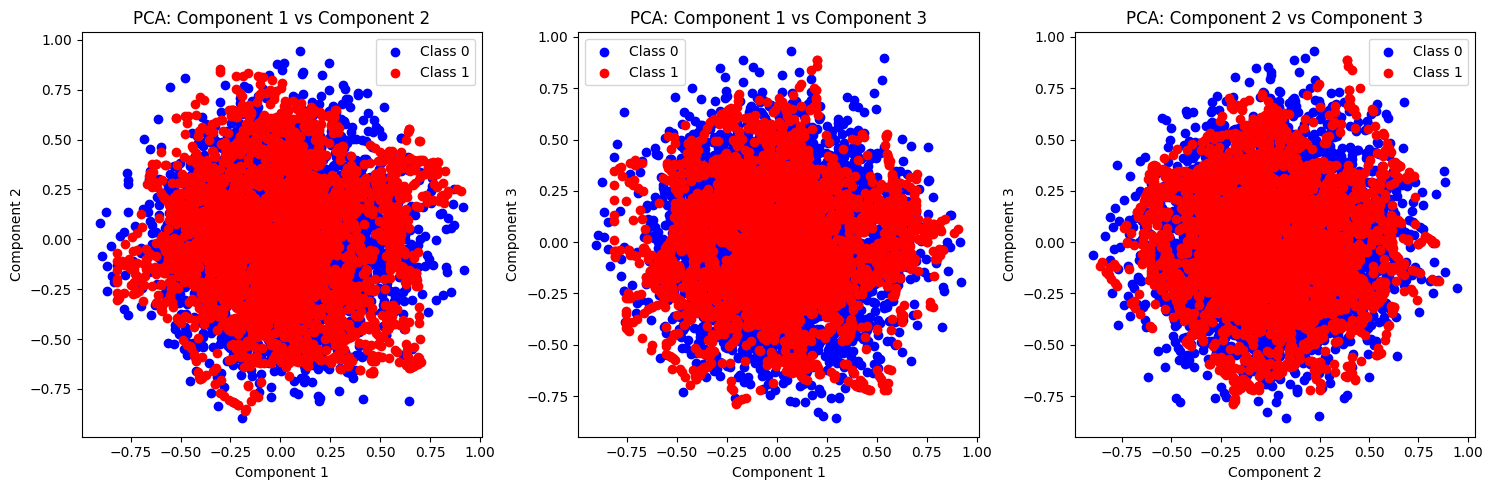

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для сокращения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_smote)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = y_smote

# Создаем scatter plot для каждой пары компонентов
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Component 1 vs Component 2')

plt.subplot(132)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 1 vs Component 3')

plt.subplot(133)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 2 vs Component 3')

plt.tight_layout()
plt.show()

In [ ]:
score3 = cross_val_score(smote_pipeline, X_train, y_train_1d, scoring='f1', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.12244898 0.0754717  0.16352201 0.05405405 0.12345679]
Average Cross Validation Recall score: 0.10779070689223429


In [ ]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
smote_rf = GridSearchCV(smote_pipeline, param_grid=new_params, cv=kf, scoring='f1',
                        return_train_score=True)
smote_rf.fit(X_train, y_train_1d)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__n_estimators': [50, 100, 200],
                         'randomforestclassifier__random_state': [13]},
             return_train_score=True, scoring='f1')

In [ ]:
print('Best parameters:', smote_rf.best_params_)
print('Best score:', smote_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__random_state': 13}
Best score: 0.5282051282051283


In [ ]:
y_pred = smote_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

smote_rf_Recall = recall_score(y_test, y_pred)
smote_rf_Precision = precision_score(y_test, y_pred)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[780 802]
 [ 80  87]]


In [ ]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Random Forest with', 'SMOTE Oversampling')
smote_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.520958,0.097863,0.164773,0.495712


## SMOTE+Tomek

In [ ]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)

In [ ]:
unique_values, counts = np.unique(y_underT, return_counts=True)

# Loop through unique values and their counts
for value, count in zip(unique_values, counts):
    percentage = count / len(y_underT) * 100
    print(f'{int(value)}: {count} / {percentage:.2f}% of the dataset')

0: 3509 / 90.00% of the dataset
1: 390 / 10.00% of the dataset


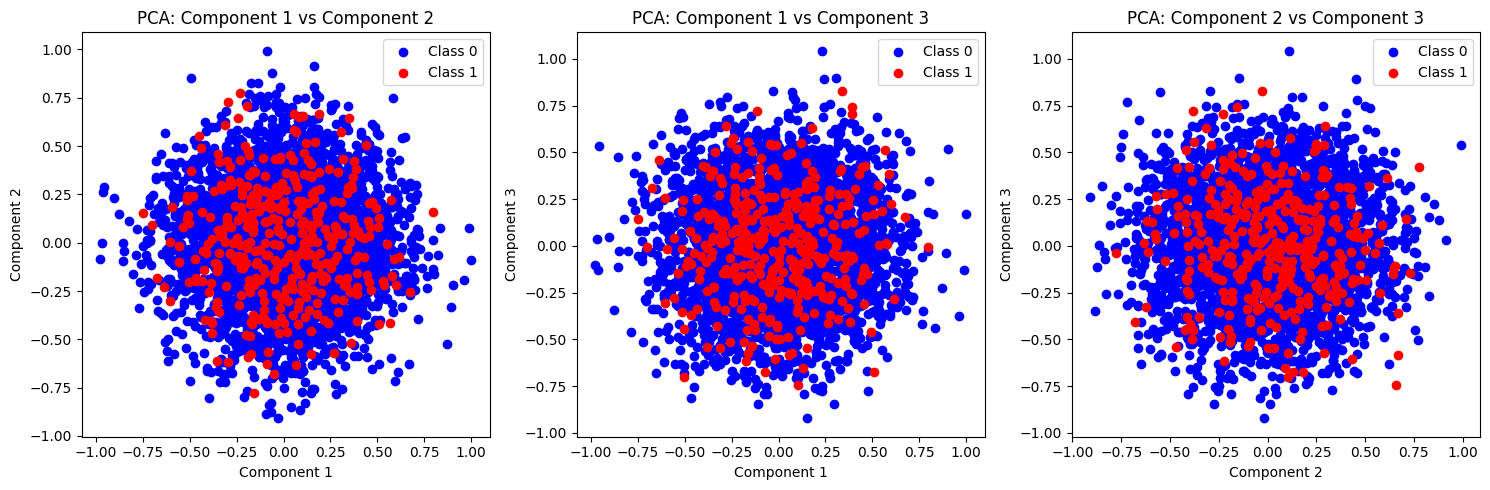

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Применяем PCA для сокращения размерности до 3 компонент
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_underT)

# Преобразуем полученные компоненты в DataFrame для удобства
pca_df = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Добавляем класс Crisis к полученным компонентам
pca_df['Crisis'] = y_underT

# Создаем scatter plot для каждой пары компонентов
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PCA: Component 1 vs Component 2')

plt.subplot(132)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 1'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 1 vs Component 3')

plt.subplot(133)
plt.scatter(pca_df.loc[pca_df['Crisis'] == 0, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 0, 'Component 3'],
            label='Class 0', color='blue')
plt.scatter(pca_df.loc[pca_df['Crisis'] == 1, 'Component 2'], pca_df.loc[pca_df['Crisis'] == 1, 'Component 3'],
            label='Class 1', color='red')
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.title('PCA: Component 2 vs Component 3')

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')),
                              RandomForestClassifier(n_estimators=100, random_state=13))
cross_val_score(smote_pipeline, X_train, y_train_1d, scoring='f1', cv=kf)

array([0.12244898, 0.0754717 , 0.16352201, 0.05405405, 0.12345679])

In [ ]:
SMOTETomek_rf = SMOTETomek_pipeline
SMOTETomek_rf.fit(X_train, y_train_1d)

Pipeline(steps=[('smotetomek',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=13))])

In [ ]:
y_pred = SMOTETomek_rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f1 = f1_score(y_test, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[1433  149]
 [ 147   20]]


In [ ]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.11976,0.118343,0.119048,0.83076


## Веса классов

In [ ]:
rfb = RandomForestClassifier(n_estimators=100, random_state=13, class_weight="balanced")

In [ ]:
score5 = cross_val_score(rfb, X_train, y_train_1d, cv=kf, scoring='f1')
print("Cross Validation Recall scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall scores are: [0. 0. 0. 0. 0.]
Average Cross Validation Recall score: 0.0


In [ ]:
grid_rfb = GridSearchCV(rfb, param_grid=params, cv=kf,
                          scoring='f1').fit(X_train, y_train_1d)

In [ ]:
y_pred = grid_rfb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

grid_rfb_Recall = recall_score(y_test, y_pred)
grid_rfb_Precision = precision_score(y_test, y_pred)
grid_rfb_f1 = f1_score(y_test, y_pred)
grid_rfb_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[1296  286]
 [ 134   33]]


In [ ]:
ndf = [(grid_rfb_Recall, grid_rfb_Precision, grid_rfb_f1, grid_rfb_accuracy)]

grid_rfb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
grid_rfb_score.insert(0, 'Random Forest with', 'Class weights')
grid_rfb_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Class weights,0.197605,0.103448,0.135802,0.759863


In [ ]:
predictions = pd.concat([rf_score, over_rf_score, smote_rf_score, SMOTETomek_rf_score, grid_rfb_score], ignore_index=True, sort=False)
predictions.sort_values(by=['F1 Score'], ascending=False)

,Random Forest with,Recall,Precision,F1 Score,Accuracy
2,SMOTE Oversampling,0.520958,0.097863,0.164773,0.495712
1,Random Oversampling,0.401198,0.089096,0.145811,0.551172
4,Class weights,0.197605,0.103448,0.135802,0.759863
3,SMOTE + Tomek,0.119760,0.118343,0.119048,0.830760
0,No Under/Oversampling,0.000000,0.000000,0.000000,0.903945


## Bagging

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train_1d)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3689    0]
 [   0  390]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3689.0  390.0       1.0     4079.0        4079.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[1580    2]
 [ 167    0]]
ACCURACY SCORE:
0.9034
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.904408    0.0  0.903373     0.452204      0.818052
recall        0.998736    0.0  0.903373     0.499368      0.903373
f1-score      0.949234    0.0  0.903373     0.474617      0.858598
support    1582.000000  167.0  0.903373  1749.000000   1749.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train_1d)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3687    2]
 [ 387    3]]
ACCURACY SCORE:
0.9046
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.905007    0.600000  0.904633     0.752504      0.875845
recall        0.999458    0.007692  0.904633     0.503575      0.904633
f1-score      0.949891    0.015190  0.904633     0.482540      0.860522
support    3689.000000  390.000000  0.904633  4079.000000   4079.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1580    2]
 [ 167    0]]
ACCURACY SCORE:
0.9034
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.904408    0.0  0.903373     0.452204      0.818052
recall        0.998736    0.0  0.903373     0.499368      0.903373
f1-score      0.949234    0.0  0.903373     0.474617      0.858598
support    1582.000000  167.0  0.903373  1749.000000   1749.000000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train_1d)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3689    0]
 [ 364   26]]
ACCURACY SCORE:
0.9108
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910190    1.000000  0.910762     0.955095      0.918777
recall        1.000000    0.066667  0.910762     0.533333      0.910762
f1-score      0.952984    0.125000  0.910762     0.538992      0.873819
support    3689.000000  390.000000  0.910762  4079.000000   4079.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1579    3]
 [ 167    0]]
ACCURACY SCORE:
0.9028
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.904353    0.0  0.902802     0.452176      0.818002
recall        0.998104    0.0  0.902802     0.499052      0.902802
f1-score      0.948918    0.0  0.902802     0.474459      0.858313
support    1582.000000  167.0  0.902802  1749.000000   1749.000000


## Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train_1d)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[3689    0]
 [ 390    0]]
ACCURACY SCORE:
0.9044
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.904388    0.0  0.904388     0.452194      0.817918
recall        1.000000    0.0  0.904388     0.500000      0.904388
f1-score      0.949794    0.0  0.904388     0.474897      0.858983
support    3689.000000  390.0  0.904388  4079.000000   4079.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1582    0]
 [ 167    0]]
ACCURACY SCORE:
0.9045
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.904517    0.0  0.904517     0.452258      0.818151
recall        1.000000    0.0  0.904517     0.500000      0.904517
f1-score      0.949865    0.0  0.904517     0.474932      0.859169
support    1582.000000  167.0  0.904517  1749.000000   1749.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Boosting: other classifiers

Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 400}
Accuracy: 0.7198
Precision: 0.0993
Recall: 0.2395
ROC AUC: 0.4857


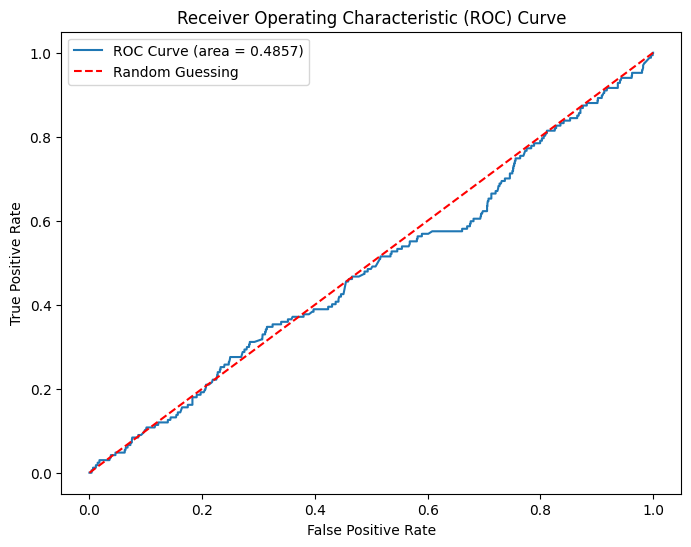

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

imbalance_ratio = 9  # Пример: отношение 2:1 между классами
param = {'objective': 'binary:logistic', 'scale_pos_weight': imbalance_ratio}

# Определение набора гиперпараметров для GridSearchCV
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [100, 200, 300, 400],
}

# Создание DMatrix для обучения
dtrain = xgb.DMatrix(X_train, label=y_train)

# Инициализация XGBoost классификатора
clf = xgb.XGBClassifier(**param)

# Использование GridSearchCV для подбора лучших гиперпараметров
grid_clf = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=3)
grid_clf.fit(X_train, y_train)

# Получение лучших гиперпараметров
best_params = grid_clf.best_params_
print("Best Hyperparameters:", best_params)

# Обучение модели с лучшими гиперпараметрами
best_clf = xgb.XGBClassifier(**param, **best_params)
best_clf.fit(X_train, y_train)

# Предсказание
predictions = best_clf.predict_proba(X_test)[:, 1]

# Расчёт основных метрик
accuracy = accuracy_score(y_test, (predictions > 0.5).astype(int))
precision = precision_score(y_test, (predictions > 0.5).astype(int))
recall = recall_score(y_test, (predictions > 0.5).astype(int))
roc_auc = roc_auc_score(y_test, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
!pip install catboost

##BEST STRATEGY YET: SMOTE+CLASS WEIGHTS

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X,Y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(oversampled_X, oversampled_Y, stratify=oversampled_Y, test_size = 0.3, random_state = 42)
X_train_sm = X_train_sm.values
X_test_sm = X_test_sm.values
y_train_sm = y_train_sm.values
y_test_sm = y_test_sm.values

Best Hyperparameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Accuracy: 0.7347
Precision: 0.6552
Recall: 0.9905
ROC AUC: 0.9442
F1 score: 0.7887


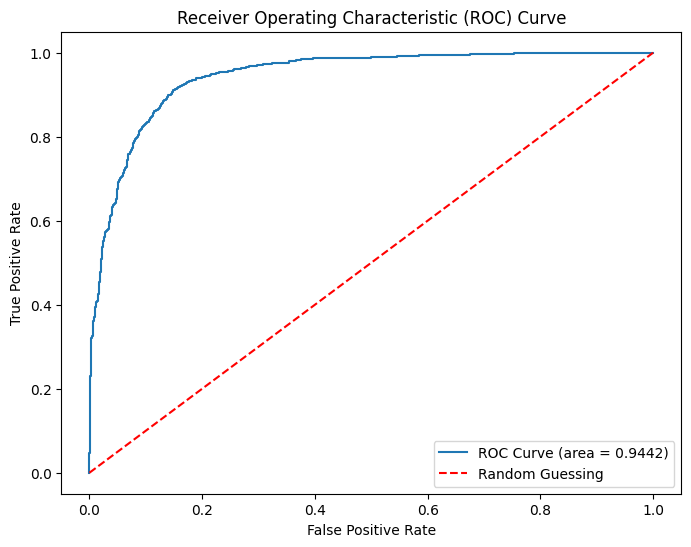

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

imbalance_ratio = 9  # Пример: отношение 2:1 между классами
param = {'scale_pos_weight': imbalance_ratio}

# Создание Pool для CatBoost
train_pool = Pool(X_train_sm, label=y_train_sm)

# Инициализация классификатора CatBoost
clf = CatBoostClassifier(**param, iterations=100, verbose=False)

# Определение набора гиперпараметров для GridSearchCV
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'iterations': [100, 200, 300]
}

# Использование GridSearchCV для подбора лучших гиперпараметров
grid_clf = GridSearchCV(clf, param_grid, scoring='f1', cv=3)
grid_clf.fit(X_train_sm, y_train_sm)

# Получение лучших гиперпараметров
best_params = grid_clf.best_params_
print("Best Hyperparameters:", best_params)

# Обучение модели с лучшими гиперпараметрами
best_clf = CatBoostClassifier(**param, **best_params, verbose=False)
best_clf.fit(X_train_sm, y_train_sm)

# Предсказание
predictions = best_clf.predict_proba(X_test_sm)[:, 1]

# Расчёт основных метрик
accuracy = accuracy_score(y_test_sm, (predictions > 0.5).astype(int))
precision = precision_score(y_test_sm, (predictions > 0.5).astype(int))
recall = recall_score(y_test_sm, (predictions > 0.5).astype(int))
roc_auc = roc_auc_score(y_test_sm, predictions)
f1 = f1_score(y_test_sm, (predictions > 0.5).astype(int))


print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'F1 score: {f1:.4f}')

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test_sm, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
